### 📌 **(ETL fase ZERO) - Extração dados:**

In [3]:
import pandas as pd
import json

url = r'data\dadosAPI\TelecomX_Data.json'
df = pd.read_json(url)

In [4]:
df.head(3)

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


### 🔧 **(ETL fase 01) - Análise do Dataframe original + normalização:**
<p style="font-size:22px; text-align: justify;">
O dataframe provém de um <strong>arquivo.json</strong>, por isso a seguir, farei uso do método normalize de maneira
a deixar o documento mais adequado para manipulação.
</p>

In [5]:
colunas_df = list(df.columns)
colunas_df

['customerID', 'Churn', 'customer', 'phone', 'internet', 'account']

In [6]:
pd.json_normalize(df['customer']).head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9


In [7]:
pd.json_normalize(df['phone']).head(2)

,PhoneService,MultipleLines
0,Yes,No
1,Yes,Yes


In [8]:
pd.json_normalize(df['internet']).head(2)

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,DSL,No,Yes,No,Yes,Yes,No
1,DSL,No,No,No,No,No,Yes


In [9]:
pd.json_normalize(df['account']).head(2)

,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,One year,Yes,Mailed check,65.6,593.3
1,Month-to-month,No,Mailed check,59.9,542.4


In [10]:
# Juntando subdataframes ao df original:
# exclui todas as colunas com objetos literais JS, e
# concatenei os dfs normalizados acima:

df = pd.concat([
    df.drop(columns=['customer','phone','internet','account']),
    pd.json_normalize(df['customer'], sep='_'),
    pd.json_normalize(df['phone'], sep='_'),
    pd.json_normalize(df['internet'], sep='_'),
    pd.json_normalize(df['account'], sep='_')
    ],
    axis=1)

In [11]:
df.set_index('customerID', inplace=True)

In [12]:
df.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total
customerID,,,,,,,,,,,,,,,,,,,,
0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [13]:
# Analizando novas colunas existentes:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7267 entries, 0002-ORFBO to 9995-HOTOH
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7267 non-null   object 
 1   gender            7267 non-null   object 
 2   SeniorCitizen     7267 non-null   int64  
 3   Partner           7267 non-null   object 
 4   Dependents        7267 non-null   object 
 5   tenure            7267 non-null   int64  
 6   PhoneService      7267 non-null   object 
 7   MultipleLines     7267 non-null   object 
 8   InternetService   7267 non-null   object 
 9   OnlineSecurity    7267 non-null   object 
 10  OnlineBackup      7267 non-null   object 
 11  DeviceProtection  7267 non-null   object 
 12  TechSupport       7267 non-null   object 
 13  StreamingTV       7267 non-null   object 
 14  StreamingMovies   7267 non-null   object 
 15  Contract          7267 non-null   object 
 16  PaperlessBilling  7267 non-null 

In [14]:
colunas_df = list(df.columns)
colunas_df

['Churn',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Charges_Monthly',
 'Charges_Total']

In [15]:
def getValoresCelulas(df, nmColOrigem):
    vlsExistentes = {
        'nm_coluna': nmColOrigem,
        'valores_vistos': \
        list(pd.unique(df[nmColOrigem]))
    }
    return vlsExistentes

In [16]:
getValoresCelulas(df, 'Churn') # Valores preenchidos em Evasão.

{'nm_coluna': 'Churn', 'valores_vistos': ['No', 'Yes', '']}

In [17]:
for nmColuna in df.columns:
    print(getValoresCelulas(df, nmColuna))

{'nm_coluna': 'Churn', 'valores_vistos': ['No', 'Yes', '']}
{'nm_coluna': 'gender', 'valores_vistos': ['Female', 'Male']}
{'nm_coluna': 'SeniorCitizen', 'valores_vistos': [0, 1]}
{'nm_coluna': 'Partner', 'valores_vistos': ['Yes', 'No']}
{'nm_coluna': 'Dependents', 'valores_vistos': ['Yes', 'No']}
{'nm_coluna': 'tenure', 'valores_vistos': [9, 4, 13, 3, 71, 63, 7, 65, 54, 72, 5, 56, 34, 1, 45, 50, 23, 55, 26, 69, 11, 37, 49, 66, 67, 20, 43, 59, 12, 27, 2, 25, 29, 14, 35, 64, 39, 40, 6, 30, 70, 57, 58, 16, 32, 33, 10, 21, 61, 15, 44, 22, 24, 19, 47, 62, 46, 52, 8, 60, 48, 28, 41, 53, 68, 51, 31, 36, 17, 18, 38, 42, 0]}
{'nm_coluna': 'PhoneService', 'valores_vistos': ['Yes', 'No']}
{'nm_coluna': 'MultipleLines', 'valores_vistos': ['No', 'Yes', 'No phone service']}
{'nm_coluna': 'InternetService', 'valores_vistos': ['DSL', 'Fiber optic', 'No']}
{'nm_coluna': 'OnlineSecurity', 'valores_vistos': ['No', 'Yes', 'No internet service']}
{'nm_coluna': 'OnlineBackup', 'valores_vistos': ['Yes', 'No'

In [18]:
df['Charges_Monthly'].isna()

customerID
0002-ORFBO    False
0003-MKNFE    False
0004-TLHLJ    False
0011-IGKFF    False
0013-EXCHZ    False
              ...  
9987-LUTYD    False
9992-RRAMN    False
9992-UJOEL    False
9993-LHIEB    False
9995-HOTOH    False
Name: Charges_Monthly, Length: 7267, dtype: bool

##### 💡**Estratégia de correção de valores inadequados:**
<p style="font-size:22px; text-align: justify;">
    <ul>
        <li>1) Antes de converter valores aos tipos 
        np.float64, string, etc; irei verificar valores inadequados, como strings vazias ou NaN.
        </li>
        <li>2) Feito isso, faço a conversão dos tipos.</li>
    </ul>
</p>

In [19]:
a = df['Churn'].isin(['Yes']).sum()

In [20]:
b = df['Churn'].isin(['No']).sum()

In [21]:
(a + b) == len(df['Churn'])

False

In [22]:
a + b

7043

In [23]:
selecao_churn1 = df['Churn'] == 'Yes'
selecao_churn2 = df['Churn'] == 'No'
len(df[selecao_churn1]) + \
len(df[selecao_churn2]) 

7043

In [24]:
df['Churn'].value_counts(dropna=False)

Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64

In [25]:
len(df[df['Churn'].isin(['Yes','No'])])

7043

In [26]:
# Série booleana com indices do DF que estão adequados
# ao padrão "Yes"/"No":
df['Churn'].isin(['Yes','No'])

customerID
0002-ORFBO    True
0003-MKNFE    True
0004-TLHLJ    True
0011-IGKFF    True
0013-EXCHZ    True
              ... 
9987-LUTYD    True
9992-RRAMN    True
9992-UJOEL    True
9993-LHIEB    True
9995-HOTOH    True
Name: Churn, Length: 7267, dtype: bool

In [27]:
# Indices os quais respeitam o padrão acima:
df[df['Churn'].isin(['Yes','No'])].head(3) 

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total
customerID,,,,,,,,,,,,,,,,,,,,
0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85


In [28]:
# Indices os quais NÃO respeitam:
df[~df['Churn'].isin(['Yes','No'])].head(3)

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total
customerID,,,,,,,,,,,,,,,,,,,,
0047-ZHDTW,,Female,0,No,No,11,Yes,Yes,Fiber optic,Yes,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),79.00,929.3
0120-YZLQA,,Male,0,No,No,71,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.90,1355.1
0154-QYHJU,,Male,0,No,No,29,Yes,No,DSL,Yes,Yes,No,Yes,No,No,One year,Yes,Electronic check,58.75,1696.2


In [29]:
len(df[~df['Churn'].isin(['Yes','No'])]) # Número deles

224

In [30]:
df = df[df['Churn'].isin(['Yes','No'])]

In [31]:
df.value_counts()

Churn  gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  MultipleLines  InternetService  OnlineSecurity       OnlineBackup         DeviceProtection     TechSupport          StreamingTV          StreamingMovies      Contract        PaperlessBilling  PaymentMethod            Charges_Monthly  Charges_Total
No     Male    0              No       No          1       Yes           No             No               No internet service  No internet service  No internet service  No internet service  No internet service  No internet service  Month-to-month  No                Mailed check             20.20            20.2             3
                                                                                                                                                                                                                                                                                                  20.05            20.05            3
Yes    Male    0           

In [32]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [33]:
df['Churn'] = df['Churn'].astype(str)

In [34]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [35]:
df = df[~df['Charges_Total'].isin(['',' '])]

In [36]:
import numpy as np

df['Charges_Total'] = df['Charges_Total'].astype(np.float64)

In [37]:
df['Charges_Monthly'].sum()

455661.0

In [38]:
df['Charges_Total'].sum()

16056168.7

### 🔧 **(ETL fase 02) - Análise exploratória dos dados:**

In [39]:
import matplotlib.pyplot as plt

In [40]:
# -----------------------------------
# Analisando porcentagem de evasões:
# -----------------------------------

In [41]:
clintes_que_evadiram = df['Churn'] == 'Yes'

porcentg_planos_cancelados = \
    len(df[clintes_que_evadiram])/len(df)

porcentg_planos_ativos = \
    1 - porcentg_planos_cancelados

In [42]:
def showPorcentagemGrupo(
    totalAmostra,
    qtdGrupo,
    legendasGraph):

    porcentagens = [totalAmostra,qtdGrupo]
    fig, ax = plt.subplots()
    ax.pie(
        porcentagens,
        labels=legendasGraph,
        autopct='%1.1f%%')
    plt.show()


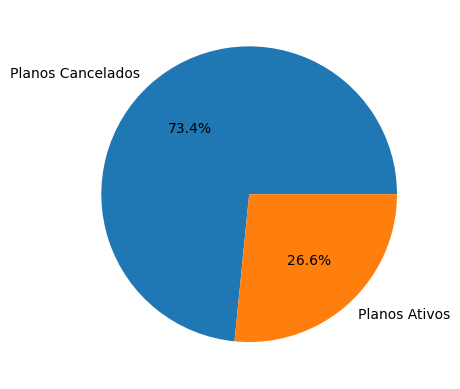

In [43]:
showPorcentagemGrupo(
    porcentg_planos_ativos,
    porcentg_planos_cancelados,
    ['Planos Cancelados','Planos Ativos'])

In [44]:
# -----------------------------------
# Analisando porcentagem de seniores:
# -----------------------------------

selecao_cliente_senior = df['SeniorCitizen'] == 1
qtd_seniores = len(df[selecao_cliente_senior])
prtg_seniores = (qtd_seniores/len(df))
prtg_nao_seniores = 1 - prtg_seniores

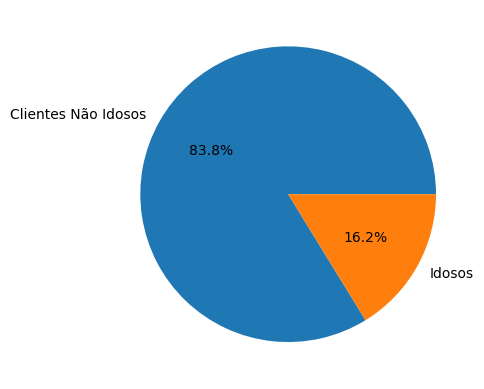

In [45]:
showPorcentagemGrupo(
    prtg_nao_seniores,
    prtg_seniores,
    ['Clientes Não Idosos','Idosos'])

In [46]:
# -----------------------------------
# Analisando porcentagem de clientes
# que possuem dependentes:
# -----------------------------------

In [47]:
selecao_cliente_provedor = df['Dependents'] == 'Yes'
qtd_provedores = len(df[selecao_cliente_provedor])
prtg_provedores = (qtd_provedores/len(df))
prtg_nao_provedores = 1 - prtg_provedores

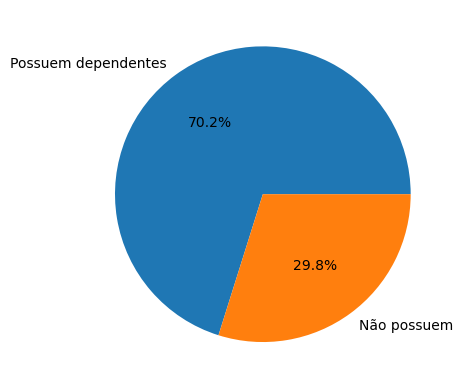

In [48]:
showPorcentagemGrupo(
    prtg_nao_provedores,
    prtg_provedores,
    ['Possuem dependentes','Não possuem']
)

##### 💡**Vou agrupar Evasões (Churns) por categorias:**
<p style="font-size:22px; text-align: justify;">
    Quero tentar entender melhor os grupos os quais tem o maior número de evasões.
</p>
<ul>
    <li>1. Evasões por tipo de contrato.</li>
    <li>2. Evasões por faixa de preço.</li>
    <li>...</li>
</ul>

In [49]:
import pandas as pd

In [50]:
tipos_contrato = list(df['Contract'].unique())

In [51]:
dict_analise = pd.DataFrame({
    'Tipos_Contrato': list(df['Contract']),
    'Evasoes': list(df['Churn'])
})

In [52]:
dict_analise['Evasoes'] = dict_analise['Evasoes'].map({
    'Yes':1,
    'No': 0
})

In [53]:
evasoes_por_contrato = dict_analise\
    .groupby('Tipos_Contrato')['Evasoes']\
    .sum()\
    .sort_values()

In [54]:
df_evasoes = pd.DataFrame(evasoes_por_contrato)
df_evasoes

,Evasoes
Tipos_Contrato,
Two year,48
One year,166
Month-to-month,1655


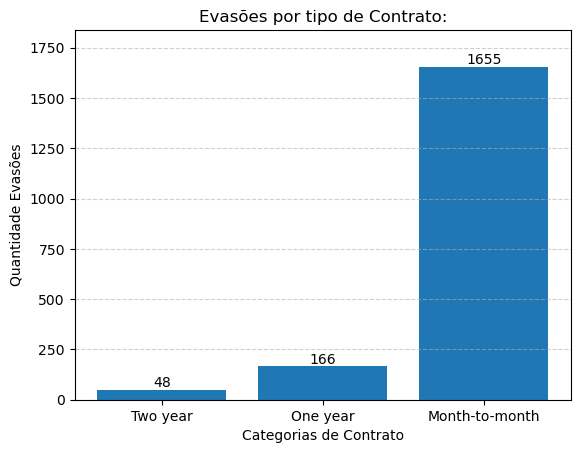

In [55]:
# plt.figure(figsize=(6,4))
# evasoes_por_contrato.plot(
#          kind='bar')

categorias = list(df_evasoes.index)
valores = [vl for vl in df_evasoes['Evasoes']]

plt.bar(categorias, valores)

plt.title('Evasões por tipo de Contrato:')
plt.xlabel('Categorias de Contrato')
plt.ylabel('Quantidade Evasões')

for i, vlr in enumerate(valores):
    plt.text(
        i,
        vlr, 
        f'{vlr}',
        ha='center',
        va='bottom')
    
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.ylim(0, max(valores) * 1.11)
plt.show()

In [56]:
df['tenure'].info()

<class 'pandas.core.series.Series'>
Index: 7032 entries, 0002-ORFBO to 9995-HOTOH
Series name: tenure
Non-Null Count  Dtype
--------------  -----
7032 non-null   int64
dtypes: int64(1)
memory usage: 109.9+ KB


In [57]:
df['tenure'].describe()

count    7032.000000
mean       32.421786
std        24.545260
min         1.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

In [58]:
df['tenure'].head()

customerID
0002-ORFBO     9
0003-MKNFE     9
0004-TLHLJ     4
0011-IGKFF    13
0013-EXCHZ     3
Name: tenure, dtype: int64

In [59]:
import seaborn as sns

np.random.seed(1)
num_var = np.random.randn(100)
num_var = pd.Series(num_var, name='Série Numérica')

In [60]:
num_var.head()

0    1.624345
1   -0.611756
2   -0.528172
3   -1.072969
4    0.865408
Name: Série Numérica, dtype: float64

<Axes: xlabel='Série Numérica', ylabel='Count'>

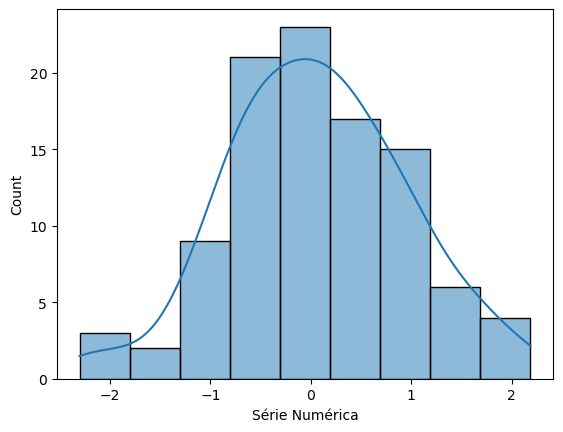

In [61]:
sns.histplot(data=num_var,kde=True)

In [62]:
# Usando histograma para contabilizar quantidade
# de contratos existentes, separando-os
# por duração:

qtd_meses_por_contrato = list(df['tenure'])

series_ = pd.Series(
    qtd_meses_por_contrato, 
    name='Duração Contrato (Meses)')

<Axes: xlabel='Duração Contrato (Meses)', ylabel='Count'>

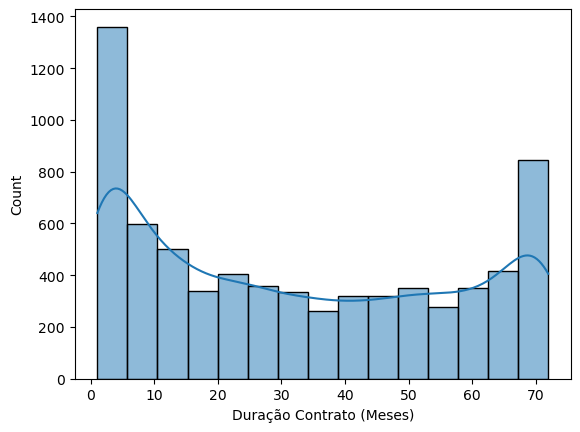

In [63]:
sns.histplot(data=series_,kde=True)

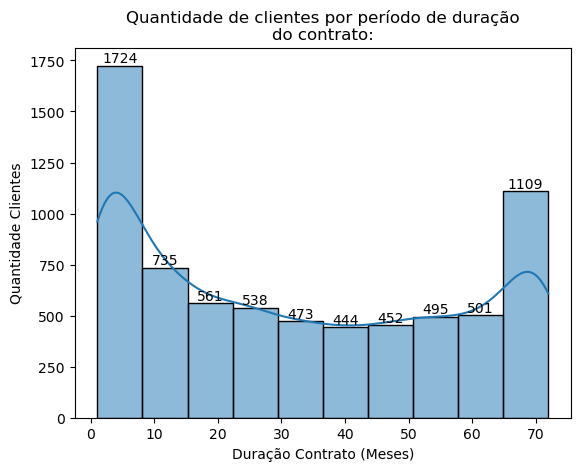

In [64]:
# Dados desejados
qtd_meses_por_contrato = list(df['tenure'])

# Dados no formato desejado por mim:
series_ = pd.Series(
    qtd_meses_por_contrato, 
    name='Duração Contrato (Meses)')

# Construção do Histograma:
fig, ax = plt.subplots()
hist_plot = sns.histplot(
    data=series_,
    kde=True,
    ax=ax,
    bins=10,        # Intervalos histograma
    element='bars', # [bars, step, poly]
    stat='count')   # 'count' -> qtd absoluta 
                    # 'percent' -> porcentagem (maneiro, vou usar dps)


# Adicionando legendas nas barrinhas
# do histograma (Seaborn):
for vl_barra in hist_plot.containers:
    ax.bar_label(vl_barra)

# Leitura do Histograma:
plt.title(
    'Quantidade de clientes por período de duração'+ 
    '\ndo contrato:')
plt.xlabel('Duração Contrato (Meses)') # Por default, ele pega da Series
plt.ylabel('Quantidade Clientes')
plt.show()

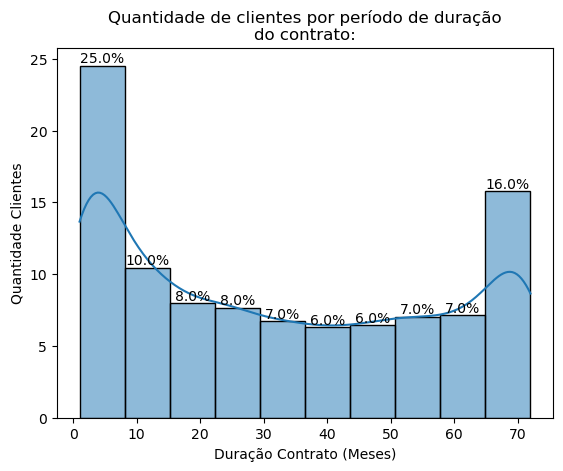

In [65]:
# Dados no formato desejado por mim:
series_ = pd.Series(
    qtd_meses_por_contrato, 
    name='Duração Contrato (Meses)')

# Construção do Histograma:
fig, ax = plt.subplots()
hist_plot = sns.histplot(
    data=series_,
    kde=True,
    ax=ax,
    bins=10,
    element='bars',
    stat='percent')


# Adicionando legendas nas barrinhas
# do histograma (Seaborn):
for vls_barras in hist_plot.containers:
    ax.bar_label(vls_barras, labels=[
            f'{round(vl_individual.get_height(), 0)}%' 
            for vl_individual in vls_barras
        ])

# Leitura do Histograma:
plt.title(
    'Quantidade de clientes por período de duração'+ 
    '\ndo contrato:')
plt.xlabel('Duração Contrato (Meses)') # Por default, ele pega da Series
plt.ylabel('Quantidade Clientes')
plt.show()

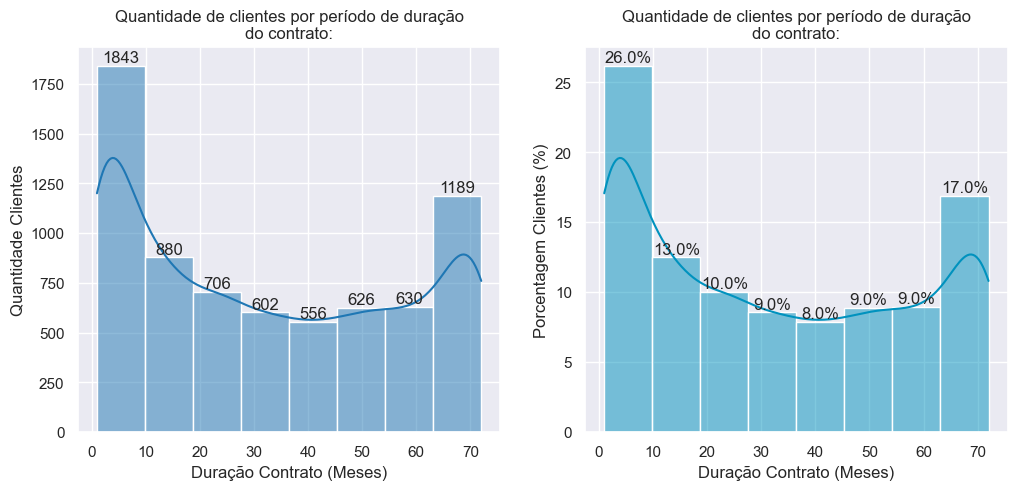

In [69]:
# 01: Dados(Series) usados - 
# Dados no formato desejado por mim:
series_ = pd.Series(
    qtd_meses_por_contrato, 
    name='Duração Contrato (Meses)')

# 02: Construção do Histograma:
fig, [ax1,ax2] = plt.subplots(1,2, figsize=(12,5))

# Configurações de Aparância Básicas:
sns.set_theme(style='darkgrid')
QTD_INTERVALOS = 8

hist_plot = sns.histplot(
    data=series_,
    kde=True,
    ax=ax1,
    bins=QTD_INTERVALOS,
    element='bars',
    stat='count',
    color="tab:blue")

for vls_barras in hist_plot.containers:
    ax1.bar_label(
        vls_barras, 
        labels=[ vl_individual.get_height() 
            for vl_individual in vls_barras])

hist_plot2 = sns.histplot(
    data=series_,
    kde=True,
    ax=ax2,
    bins=QTD_INTERVALOS,
    element='bars',
    stat='percent',
    color="#0092BE")

# 03: Adicionando legendas nas barrinhas
# do histograma (Seaborn):

for vls_barras in hist_plot2.containers:
    ax2.bar_label(vls_barras, labels=[
            f'{round(vl_individual.get_height(), 0)}%' 
            for vl_individual in vls_barras
        ])

# Leitura do Histograma (0,0):
ax1.set_title(
    'Quantidade de clientes por período de duração'+ 
    '\ndo contrato:')
ax1.set_xlabel('Duração Contrato (Meses)') # Por default, ele pega da Series
ax1.set_ylabel('Quantidade Clientes')

# Leitura do Histograma (0,1):
ax2.set_title(
    'Quantidade de clientes por período de duração'+ 
    '\ndo contrato:')
ax2.set_xlabel('Duração Contrato (Meses)') # Por default, ele pega da Series
ax2.set_ylabel('Porcentagem Clientes (%)')

plt.show()